In [14]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np


df = pd.read_csv("/content/drive/My Drive/dataset.tsv",  sep='\t', na_filter=False)
df=df[['sentiment', 'review']]
df.head()

totalRows=len(df.index)
splitRatio=0.80
splitPoint=int(splitRatio*totalRows)
print(splitPoint)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
20000


In [15]:
#parsing html
from bs4 import BeautifulSoup
import re

def parseHtml(html):
  soup = BeautifulSoup(html, 'html.parser')
  return soup.get_text()

def remove_special_numeric(text):
    #text = re.sub('\[[^]]*\]', '', text)
    text=re.sub(r'[^\w\s]', '', text)
    #text = re.sub('[^a-zA-z0-9\s]', '', text)
    text=re.sub('[0-9]+', '', text)
    return text

def lowerCase(text):
  return text.lower()


import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

def stemSentence(sentence):
  porter=PorterStemmer()
  token_words=word_tokenize(sentence)
  token_words
  stem_sentence=[]
  for word in token_words:
      stem_sentence.append(porter.stem(word))
      stem_sentence.append(" ")
  return "".join(stem_sentence)

def removeStopWords(text):
  new_sentence=[]
  token_words=word_tokenize(text)
  for word in token_words:
    if word in stop_words:
      continue
    else:
      new_sentence.append(word)
      new_sentence.append(" ")
  return "".join(new_sentence)


def applyAll(text):
  text=parseHtml(text)
  text=remove_special_numeric(text)
  text=lowerCase(text)
  text=removeStopWords(text)
  text=stemSentence(text)
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df['review']=df['review'].apply(applyAll)
df.head

<bound method NDFrame.head of        sentiment                                             review
0              1  stuff go moment mj ive start listen music watc...
1              1  classic war world timothi hine entertain film ...
2              0  film start manag nichola bell give welcom inve...
3              0  must assum prais film greatest film opera ever...
4              1  superbl trashi wondrous unpretenti exploit hoo...
...          ...                                                ...
24995          0  seem like consider gone imdb review film went ...
24996          0  dont believ made film complet unnecessari firs...
24997          0  guy loser cant get girl need build pick strong...
24998          0  minut documentari buñuel made earli one spain ...
24999          1  saw movi child broke heart stori unfinish end ...

[25000 rows x 2 columns]>

In [17]:
#Let's define a function that can display the accuracy, F1-score, label-wise precision, recall, etc. of each classifier

from sklearn.metrics import accuracy_score
#add path of google drive to environment variable to load python files from google drive
import sys
sys.path.insert(1, "/content/drive/My Drive")
from visualization import plot_confusion_matrix_from_data
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score

def printResults(y_true, y_predicted):
  print("Accuracy= ", accuracy_score(y_true, y_predicted))

  columns=['false', 'true']
  plot_confusion_matrix_from_data(y_true, y_predicted, columns)

  precision, recall, fscore, support = score(y_true, y_predicted)

  print('###########################################')
  print('precision: {}'.format(precision))  
  print('recall: {}'.format(recall))
  print('fscore: {}'.format(fscore))
  print('support: {}'.format(support))
  print('###########################################3')

  print('Macro F1 ',f1_score(y_true, y_predicted, average='macro'))

  print('Micro F1 ', f1_score(y_true, y_predicted, average='micro'))



In [18]:
#RAW Count Based Vectors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
vectorizer = CountVectorizer(analyzer='word')
vectors = vectorizer.fit_transform(df['review'])
print(vectors.shape)
clf = MultinomialNB()

trainX=vectors[:splitPoint]
trainY=df.sentiment[:splitPoint]
clf.fit(trainX, trainY)


(25000, 109092)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
testX=vectors[splitPoint:]
testY=df.sentiment[splitPoint:]
testYPredicted=list(clf.predict(testX))


Accuracy=  0.8456


/content/drive/My Drive/visualization.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/drive/My Drive/visualization.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/content/drive/My Drive/visualization.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/drive/My Drive/visualization.py:169: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


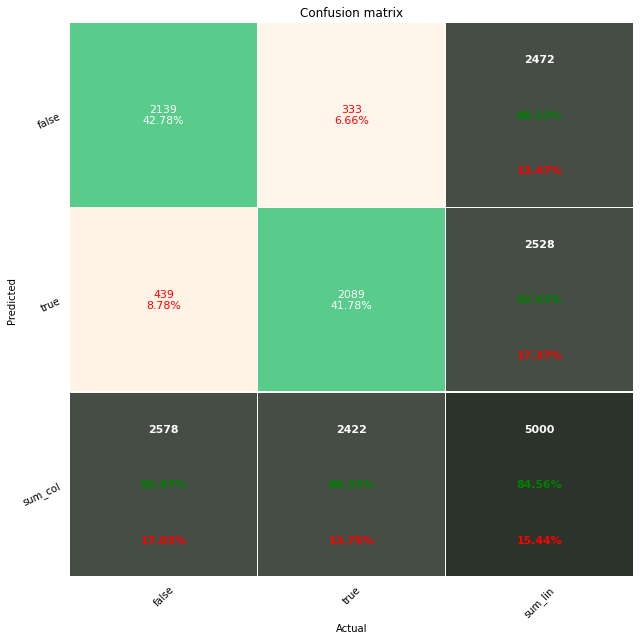

###########################################
precision: [0.86529126 0.82634494]
recall: [0.82971296 0.86251032]
fscore: [0.84712871 0.8440404 ]
support: [2578 2422]
###########################################3
Macro F1  0.8455845584558456
Micro F1  0.8456


In [20]:
printResults(testYPredicted, testY)

In [21]:
#TF-IDF Based Vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
vectorizer = TfidfVectorizer(analyzer='word')
vectors = vectorizer.fit_transform(df['review'])
print(vectors.shape)
clf = MultinomialNB()

trainX=vectors[:splitPoint]
trainY=df.sentiment[:splitPoint]
clf.fit(trainX, trainY)


(25000, 109092)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
testX=vectors[splitPoint:]
testY=df.sentiment[splitPoint:]
testYPredicted=list(clf.predict(testX))

Accuracy=  0.853


/content/drive/My Drive/visualization.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/drive/My Drive/visualization.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/content/drive/My Drive/visualization.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/drive/My Drive/visualization.py:169: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


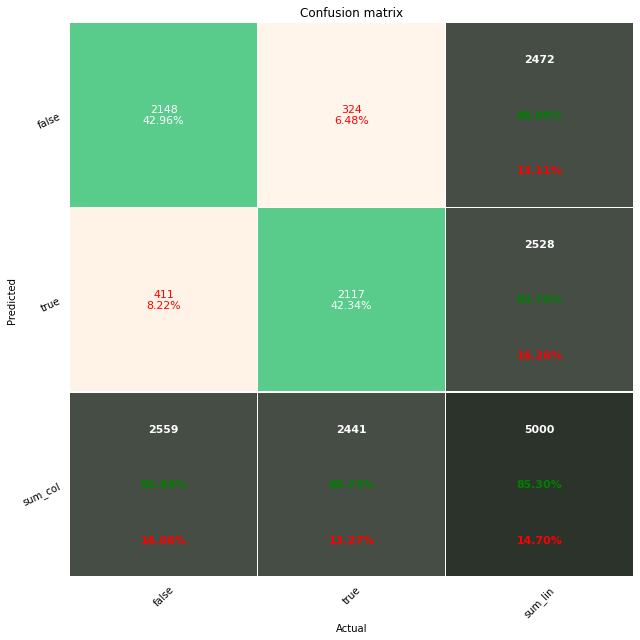

###########################################
precision: [0.86893204 0.83742089]
recall: [0.83939039 0.86726751]
fscore: [0.85390578 0.85208291]
support: [2559 2441]
###########################################3
Macro F1  0.8529943491027794
Micro F1  0.853


In [23]:
printResults(testYPredicted, testY)

In [24]:
#TF-IDF (bigram, trigram) Based Vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2,3))
vectors = vectorizer.fit_transform(df['review'])
print(vectors.shape)
clf = MultinomialNB()

trainX=vectors[:splitPoint]
trainY=df.sentiment[:splitPoint]
clf.fit(trainX, trainY)

(25000, 4378555)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
testX=vectors[splitPoint:]
testY=df.sentiment[splitPoint:]
testYPredicted=list(clf.predict(testX))

Accuracy=  0.869


/content/drive/My Drive/visualization.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/drive/My Drive/visualization.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/content/drive/My Drive/visualization.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/drive/My Drive/visualization.py:169: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


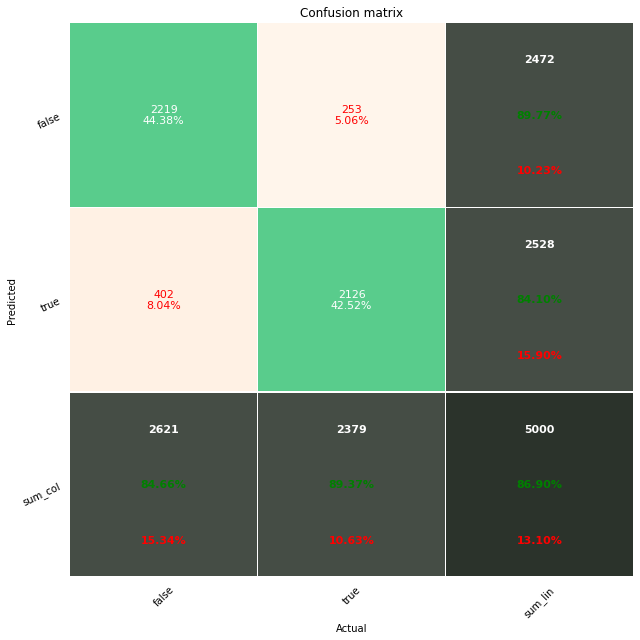

###########################################
precision: [0.89765372 0.84098101]
recall: [0.84662343 0.8936528 ]
fscore: [0.87139211 0.86651722]
support: [2621 2379]
###########################################3
Macro F1  0.8689546635554035
Micro F1  0.869


In [26]:
printResults(testYPredicted, testY)